<a href="https://colab.research.google.com/github/rajeshmore1/Deep-Learning-Mentorship--Rajesh-More/blob/main/Regression_With_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Brief Introduction to Neural Networks : A Regression Problem

# Introduction
The goal of machine learning is to come up with a model (a method) to predict the value, class, or cluster of an input instance. This model is built by exploiting existing data (dataset). In order to implement such a model, a set of steps is considered, namely:

Problem understanding.

Data preparation and pre-processing.

Model conception.

Training the model.

Model evaluation and validation

# Libraries
In this tutorial, we will be using:

1. pandas: for data manipulation (importing and splitting data).
2. keras: for model conception and training.
3. matplotlib: for data visualization.
4. scikit-learn (sklearn): for additional metrics computing.

In [1]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange

We also add the following lines to reproduce the results each execution:



In [10]:
from numpy.random import seed
seed(1)
from tensorflow import random, config
random.set_seed(1)
config.experimental.enable_op_determinism()
import random
random.seed(2)
import keras

# 3. Problem understanding
Understanding the problem is the first step to consider. It consists of identifying the nature of the problem: is it a regression problem (predicting a real value such the users’ engagement rate with different products) or a classification problem (predicting the class of an input instance like the classification of Iris flowers or sentiment analyses). Sometimes regression can give bad results, in this case, you have to think about the possibility of turning it into a classification problem. For example: transform the problem of predicting the user engagement rate into a problem of classifying his engagement (0 engagement, low engagement, medium engagement and high engagement).

As an example, I created a toy dataset that you can download from my GitHub repository. The dataset represents a signal and the objective of this example is to learn the signal function so that we can use it for future predictions. In the next section, we will explore it by code. (https://github.com/Chim-SO/introductiontomachinelearning/blob/main/dataset/train.csv)

# Data preparation and preprocessing
Using neural networks to solve a given problem means exploiting a dataset. Before that, the dataset needs to be preprocessed. Data preprocessing generally includes cleaning (replacing missing values and removing outliers), discretization (converting continuous data into a finite set of intervals with minimum data loss) and normalization (like normalize the values to be between 0 and 1). The techniques to be used in this step depend on the nature of the data-set and/or the nature of the model to be used subsequently. During data preprocessing, it is important to visualize your data to make sure that it is correctly processed. At the end of this phase, the data-set is generally partitioned into 2 sets:

* The training set: used to set model parameters such as weights in neural networks and coefficients in linear regression.
* The validation set: used to evaluate the behavior of the model against new data (which does not belong to the training set) during training.

In this article our main focus is the neural networks side. Therefore, we will be using a dataset that does not require preprocessing.

Let’s start by importing the dataset, print the 5th first rows and plot the scatter:



In [6]:
# Read dataset:
dataset = pd.read_csv('https://raw.githubusercontent.com/Chim-SO/introductiontomachinelearning/main/dataset/train.csv')
print(f"There are {len(dataset.index)} instances.")
print(dataset.head())


There are 510 instances.
         x       y
0  10.5392  1.2058
1   5.1571  2.6770
2  12.6563  3.1471
3  11.7546  2.3668
4  10.9499  2.3400


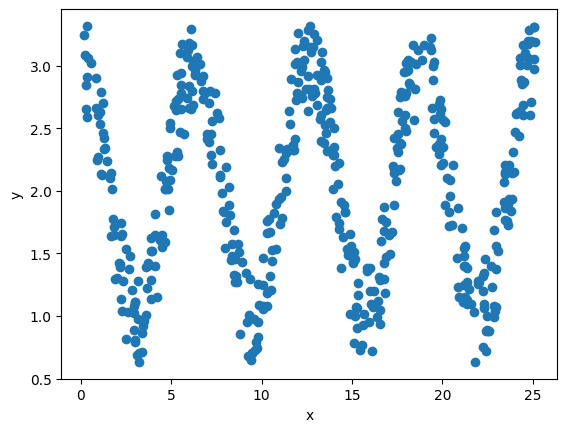

In [7]:
plt.scatter(dataset['x'], dataset['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The dataset includes 510 rows (instances) and two columns: a single feature (x) and the value to learn, also called the target (y). Both features are real numbers.

Now, we randomly split the dataset into 2 sets: the train set and the validation set. 30% of the data will be used for validation and 70% for training:



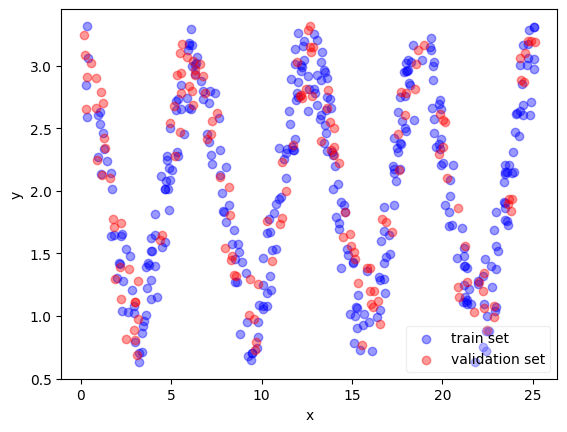

In [8]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    return train, val

# Split dataset into train and validation:
train, validation = split_dataset(dataset, train_frac=0.7)
plt.scatter(train['x'], train['y'], c='blue', alpha=0.4)
plt.scatter(validation['x'], validation['y'], c='red', alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()

The dataset is now ready to be used in the next step. We will not apply any further data preprocessing. The most important thing is that there are no missing values since neural networks can not handle missing values. We will see through the next tutorials how we can handle them and how to apply further data preprocessing; meanwhile you can check other Medium articles. Note that, I provided another dataset ‘test.csv’ as the test set. Here, the test set is selected randomly from the original dataset. It will be used to test the model after training.

# Model conception
Once the problem is understood and the data is prepared, the model conception takes place. Designing a neural network model includes: defining the number of neurons in each layer, defining the number of layers and defining the activation functions. In this section, we will explore the different types of layers provided by Keras. Then, the activation functions are presented. Finally, we will create our multi layer perceptron neural network. But first, let’s learn about a single neuron model (also called a node).



# Artificial neuron model
The following Figure describes an artificial neuron model:

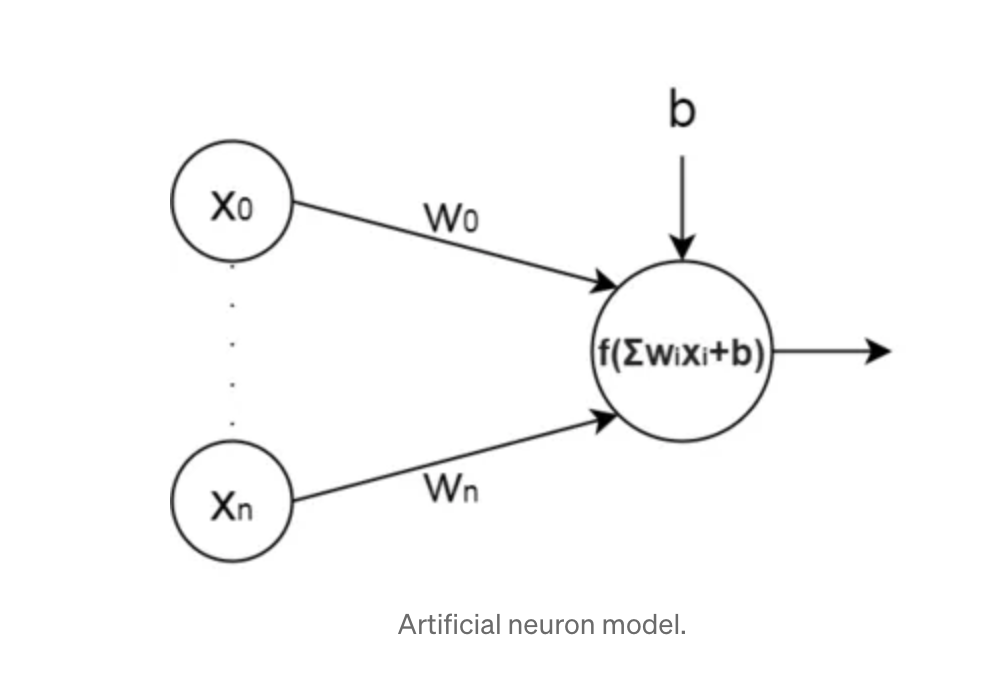

A single neuron model is represented by its:

* **Weights (W0, .., Wn).** A weight defines the impact of its associated input on the neuron’s output. The weights are initialized before training and updated during training.

* **Bias (b).** A bias is a constant that is not associated with an input. We can see it as the intercept used to offset the result. Similarly to weights, the bias is initialized before training and updated during training.

* **Activation function (f).** The activation function defines the output of the node in terms of the weighted sum. If the activation function is linear then the weighted sum is returned. Keras provides several activation functions which we will see in a moment.

The input of an artificial neuron (x0, .., xn) can be the input dataset (the features) or the output of other artificial neurons.

# Activation functions
Keras provides a rich set of activation functions among which we cite: the linear function, the sigmoid function, the tanh function, the softplus function, the softsign function, the ReLU (Rectified Linear Unit) function, the SELU (Scaled Exponential Linear Unit) function and the ELU (Exponential Linear Unit) function. These functions are represented in the following Figure. We set the x in [-10, +10].

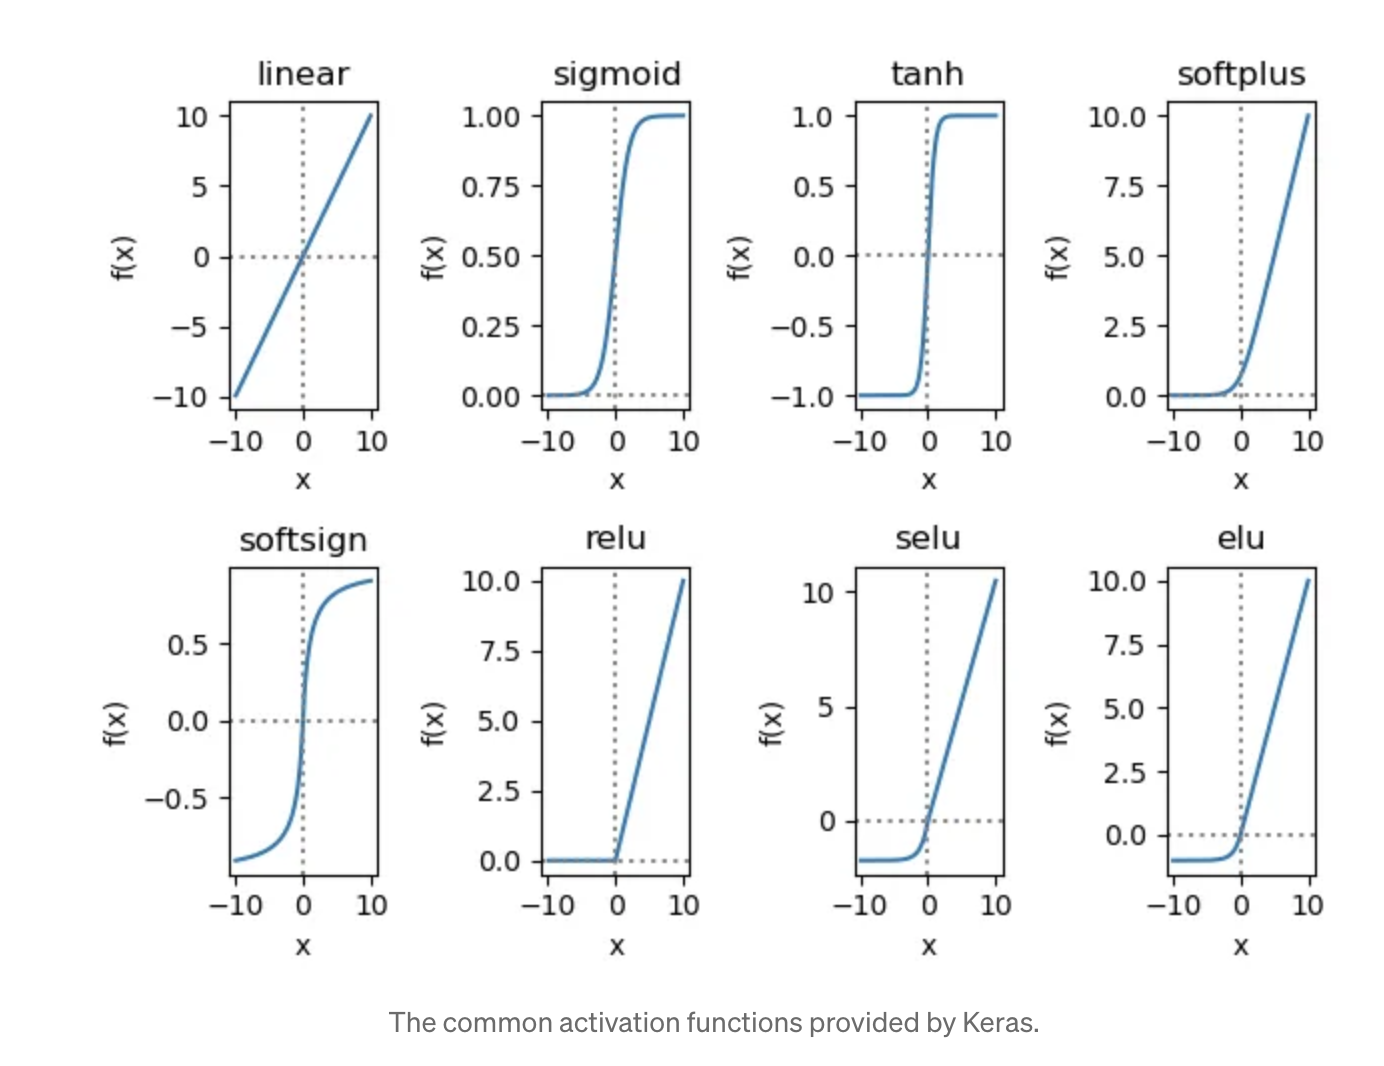

#Layers
Now that we have introduced a single neuron model, what if we have multiple neurons (nodes)? A set of nodes having the same input builds a layer (see the following Figure). The nodes of the same layer have generally the same activation function.

ccording to the documentation, Keras provides many types of layers. Each layer has its own arguments and functionality. There are convolution layers and pooling layers that are usually used for 2D and 3D data, there are normalization layers and regularization layers that are usually used to normalize and regularize the layer’s input and there are the core layers. In this tutorial, we are only interested in the Input and the Dense layer that are core layers.

The Input layer is used to define the number of features (the shape) of the model’s input. In Keras, it is mainly defined as:





In [12]:
"""keras.Input(
    shape=None,
    **kwargs
)"""

'keras.Input(\n    shape=None,\n    **kwargs\n)'

A dense layer is a set of nodes called units in Keras. It is mainly defined as:



In [ ]:
"""
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    **kwargs
)
"""

Where:

1. **units** is the number of neurons in this layer.
2. **activation** is the activation function for the units.
3. **use_bias** is a boolean to specify whether the bias is used or not. It is set to True by default.
4. **kernal_initializer** and **bias_initializer** define how the weights and the bias are initialized respectively. By default, they are set to glorot_uniform and zeros respectively.

# Multi layer model
A succession of layers defines a multi layer model. Generally, each node of the current layer is connected to all nodes of the previous/next layer. This type of model is called a fully connected network. In a model there is three types of layers:

* The input layer is the very first layer that its input is the instance features: the model’s input.
* The output layer is the last layer that its output is the whole model output. The activation function of this layer has to be selected carefully according to the needed output.
* The hidden layers are the layers between the input and the output layers.

Now moving on to writing some code and let’s create our model! The model includes: an input layer that defines the number of features, three hidden layers with 200 units and the sigmoid activation function for each layer, and finally the output layer with a single unit and the linear activation function:

In [13]:
# Create model:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________
None


The function model.summary() displays the model architecture. For each layer, its type, its output shape (the number of units) and the number of weights are displayed. The number of weights of dense_1 is computed as follows: the number of input which are the units of the previous dense layer is 200 and each unit is connected to all the previous units so we have 200 * 200 = 40000 weights. In addition, each unit has its bias then in total we have 200 biases. Therefore, the total number of parameters is 40000 + 200 = 40200 . Can you tell me how the number of parameters of dense and dense_3 are computed?

Our model is ready for training!

# Training
So what is training? Training is finding the weights that fit well as much as possible the train data. In other words, it is the process of updating the weights so that the difference between the predicted value and the ground truth (also called target) is very small. We can also see it as an optimization problem when the objective is to find the best weight to minimize the difference between the model output and the target.

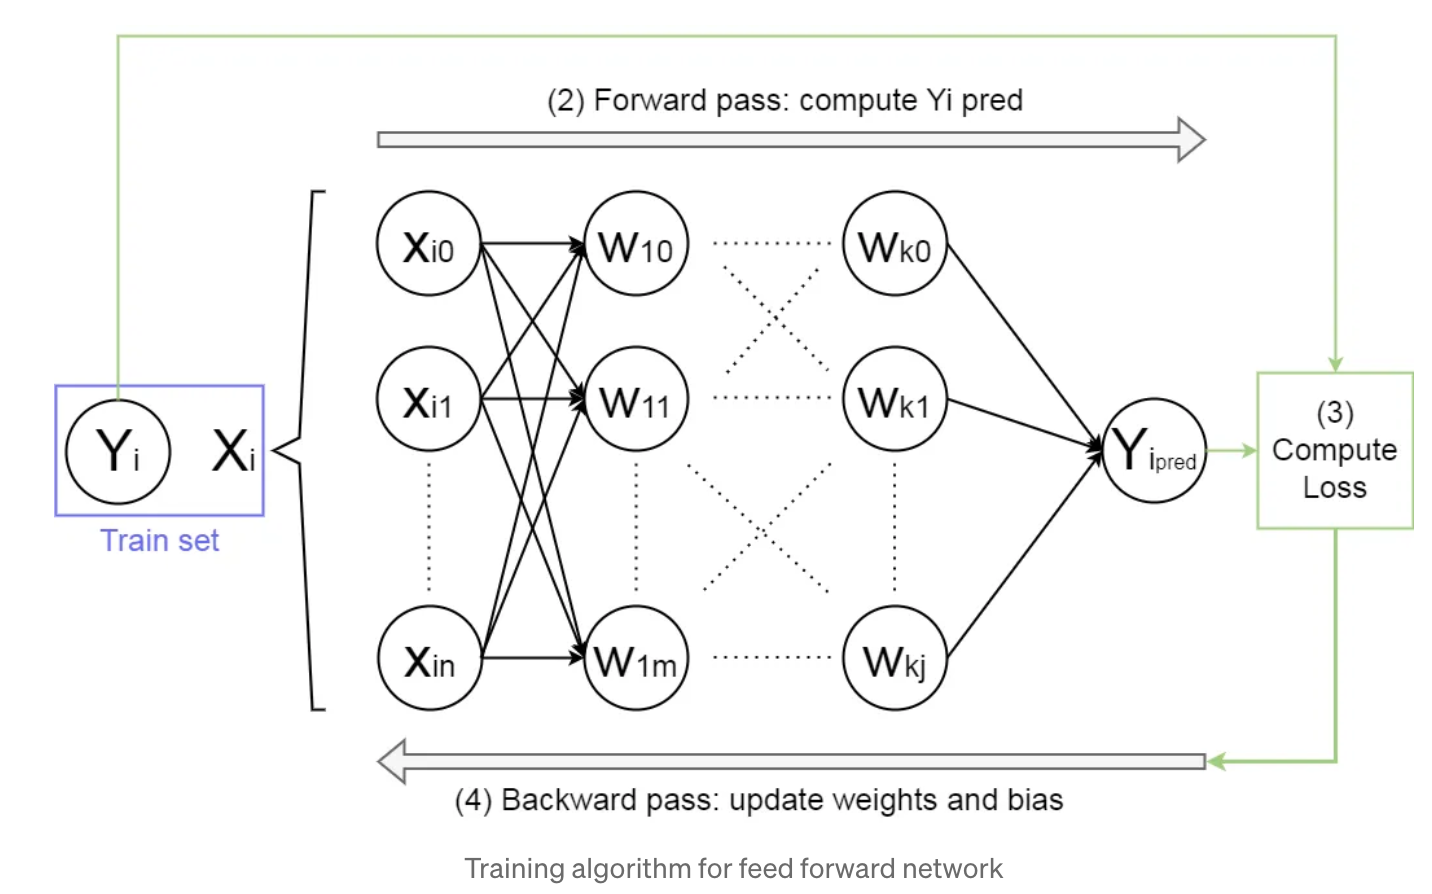

So how does training work? To answer this question, we describe the different steps in a simple way.

1. Initialize the weights and bias.
2. Forward pass: compute the model output.
3. Measure the error between the target and the output using the loss function.
4. Backward pass: propagate the error and update the weights and bias using an optimizer.
5. Repeat the steps 2 to 4 for every batch.
6. Repeat the steps from 2 to 5 epochs times.

* **Optimizer.** It updates the trainable weights. Keras provides a set of optimizers among which there are SGD (Stochastic Gradient Descent) and Adam.
* **Loss function.** It measures how well the model is able to fit the training set; in other words, it measures the difference between the prediction and the ground truth during training. Keras implements different types of loss functions. Among the loss functions for regression there are MSE (Mean Squared Error) and MAE (Mean Absolute Error).
* **Batch.** The batch is the number of samples that are used in order to update weights. During training, the data is divided into batches and the weights are updated according to each batch.
* **Epochs.** An epoch is when all the training data is used. The number of epochs defines how many times the weights are updated along all the training data. It is one of the conditions that stops training.
* **Learning rate.** The learning rate controls how the weights are affected by the propagated error; it is generally set between [0, 1] and can be updated during training. For example, the default learning rate of SGD and Adam are equal to 0.01 and 0.001 respectively.

In Keras, the first thing to do before starting training is to compile your model which means configure your model by passing some parameters like: the loss function, the optimizer and the metrics to track during training. Here, we specified the optimizer that we will be using as a string that means the default parameters will be used including the learning rate. To train the model, the function fit() is called. In this example, we passed the train data ( x_tain and y_train ) the number of epochs and the batch size as parameters.



In [34]:
# Train:
from sklearn.model_selection import train_test_split


epochs = 1700
x_train, y_train = train['x'], train['y']

X_train, X_val, Y_train, Y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)




(285,)
(285,)
(72,)
(72,)


In [35]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(X_val, Y_val))

"""
When the verbose=1 , the loss ( loss , val_loss ) and the metrics ( mae , val_mae ) values are printed at the end of each epoch for the train and validation set respectively:
"""

Epoch 1/1700
5/5 [==============================] - 1s 206ms/step - loss: 0.5327 - mae: 0.6140 - val_loss: 0.7390 - val_mae: 0.7349
Epoch 2/1700
5/5 [==============================] - 0s 15ms/step - loss: 0.5825 - mae: 0.6519 - val_loss: 0.6947 - val_mae: 0.6869
Epoch 3/1700
5/5 [==============================] - 0s 14ms/step - loss: 0.5794 - mae: 0.6390 - val_loss: 0.5852 - val_mae: 0.6643
Epoch 4/1700
5/5 [==============================] - 0s 15ms/step - loss: 0.5602 - mae: 0.6477 - val_loss: 0.6104 - val_mae: 0.6782
Epoch 5/1700
5/5 [==============================] - 0s 15ms/step - loss: 0.5427 - mae: 0.6417 - val_loss: 0.6294 - val_mae: 0.6629
Epoch 6/1700
5/5 [==============================] - 0s 16ms/step - loss: 0.5552 - mae: 0.6384 - val_loss: 0.5853 - val_mae: 0.6566
Epoch 7/1700
5/5 [==============================] - 0s 15ms/step - loss: 0.5247 - mae: 0.6336 - val_loss: 0.5859 - val_mae: 0.6646
Epoch 8/1700
5/5 [==============================] - 0s 16ms/step - loss: 0.5334 - 

'\nWhen the verbose=1 , the loss ( loss , val_loss ) and the metrics ( mae , val_mae ) values are printed at the end of each epoch for the train and validation set respectively:\n'

# Validation
The displayed metrics of the last epochs isn’t enough to conclude whether the model has learnt from data or not. The first thing to observe is the learning curves. Then, we can evaluate our model using other metrics. We can also test it on a test set if it’s available.

### Learning curves
Learning curves are the first metrics that I always observe after the training ends. It reveals the model performance during training for the seen data (train set) and the unseen data (validation set).

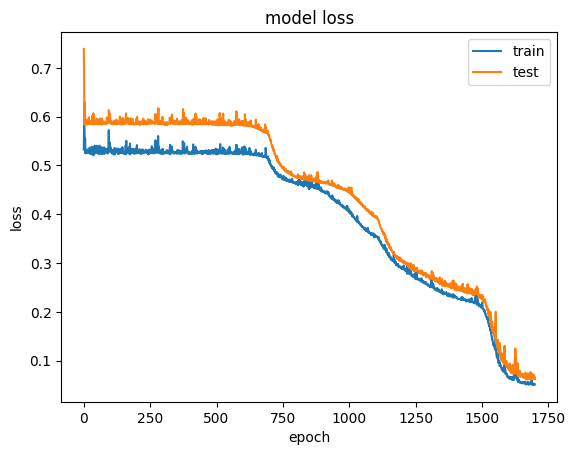

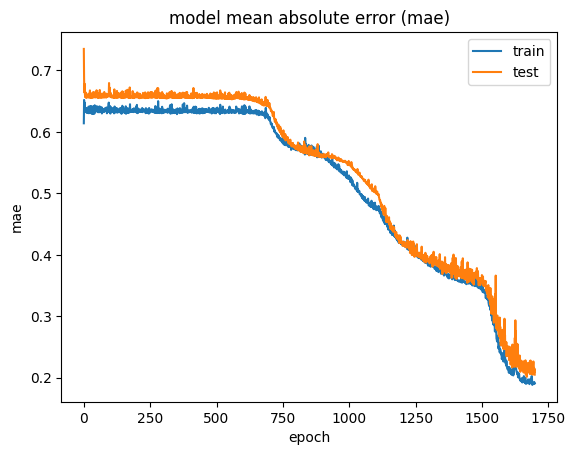

In [36]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#  Evaluation on test set
Usually, the test set comes with the data set. It is used to evaluate the model after training. Sometimes you need to split the dataset yourself into training, validation, and test sets. However, when the dataset is small, the test set is not considered. As I mentioned earlier, in this tutorial, the test set is provided along the dataset.

Let’s evaluate our model on the test set and see how it works. We first import the test set and then call the method evaluate() that returns the loss and the metrics used during training:

In [37]:
# Evaluate on test set:
test = pd.read_csv('https://raw.githubusercontent.com/Chim-SO/introductiontomachinelearning/main/dataset/test.csv')
test_results = model.evaluate(test['x'], test['y'], verbose=1)
print(f'Test set: - loss: {test_results[0]} - mae: {test_results[1]}')

3/3 [==============================] - 0s 5ms/step - loss: 0.0552 - mae: 0.1990
Test set: - loss: 0.05524660646915436 - mae: 0.19896604120731354


# Evaluation metrics
During training to metrics were used :

* Mean Squared Error (MSE) that was used as the lost function.
* Mean Absolute Error (MAE) that was an additional metric.
We can evaluate our model using other metrics and I selected 2 other metrics that I find interesting:

* Median Absolute Error (MedAE) that is robust to outliers since it takes the median instead of the mean of all absolute differences between the target and the prediction.
* Mean Absolute Percentage Error (MAPE) that is sensitive to relative errors and it is not affected by global scaling of the target variable: it computes the percentage of error.

In [38]:
# Other metrics:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(test['x'])
print("Displaying other metrics:")
print("\t\tMedAE\tMAPE")
print(f"Train:\t{round(median_absolute_error(Y_train, train_pred) ,3)}\t{round(mean_absolute_percentage_error(Y_train, train_pred), 3)}")
print(f"Val  :\t{round(median_absolute_error(Y_val, val_pred) ,3)}\t{round(mean_absolute_percentage_error(Y_val, val_pred), 3)}")
print(f"Test :\t{round(median_absolute_error(test['y'], test_pred) ,3)}\t{round(mean_absolute_percentage_error(test['y'], test_pred), 3)}")


Displaying other metrics:
		MedAE	MAPE
Train:	0.195	0.113
Val  :	0.176	0.129
Test :	0.19	0.116


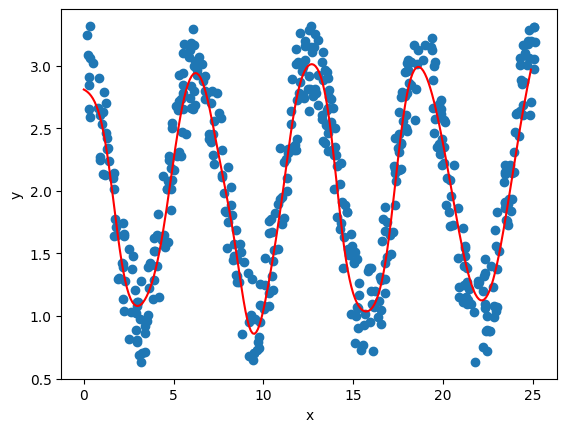

In [39]:
"""
Displaying the learnt function
Even if the computed metrics reveal that the model fits the dataset well, it is important to see visually how well it is. Here, we draw the learnt function in terms of x :
"""
# Display function:
plt.scatter(dataset['x'], dataset['y'])
x = arange(0, 25, 0.1).tolist()
plt.plot(x, model.predict(x), c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()